In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import plot_model, to_categorical
from sklearn.metrics import classification_report
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
def one_plot(loss, val_loss, acc, val_acc):
    fig, ax = plt.subplots(2, 1, figsize=(20,15))
    ax[0].plot(loss, color = 'r', label = 'loss', linestyle = '--')
    ax[0].plot(val_loss, color = 'g', label = 'val_loss')
    ax[1].plot(acc, color = 'r', label = 'acc', linestyle = '--')
    ax[1].plot(val_acc, color = 'g', label = 'val_acc')
    ax[0].set_ylim((min(min(val_loss),min(loss)), 1.5*max(val_loss + loss)))
    ax[1].set_ylim((min(min(val_acc),min(acc)), 1))
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[1].set_xlabel('Epoch')
    ax[0].legend()
    ax[1].legend()
    
def load_from_binary(path_x_train, path_y_train,
                    path_x_test, path_y_test,
                    imsize):
    with open(path_x_train, 'rb') as read_binary:
        x_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_train, 'rb') as read_binary:
        y_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_x_test, 'rb') as read_binary:
        x_test = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_test, 'rb') as read_binary:
        y_test = np.fromfile(read_binary, dtype = np.uint8)
    x_train = np.array(x_train, dtype = 'float32') / 255
    x_test = np.array(x_test, dtype = 'float32') / 255
    x_train = x_train.reshape(-1, 1,  imsize , imsize)
    x_test = x_test.reshape(-1, 1, imsize , imsize)
    return x_train, y_train, x_test, y_test

In [5]:
num_classes = 10
img_rows = img_cols = 28
file_image_train = 'mnist/images_trn.bin'
file_lable_train = 'mnist/labels_trn.bin'
file_image_test = 'mnist/images_tst.bin'
file_lable_test = 'mnist/labels_tst.bin'
x_train, y_train, x_test, y_test = load_from_binary(file_image_train, file_lable_train,
                                                   file_image_test, file_lable_test, img_rows)

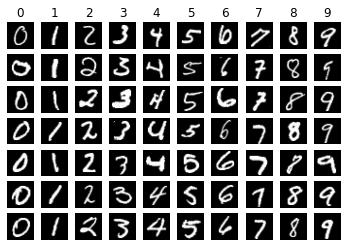

In [15]:
classes = list(np.arange(num_classes))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow((x_train[idx]*255).reshape(img_cols, img_cols).astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [16]:
inp = Input((1, img_rows, img_cols)) # Входной слой
x = Dropout(0.3)(inp)
x = Conv2D(8, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D(pool_size = 2, strides = 2, padding = 'same')(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(units = 32, activation = 'relu')(x)
output = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = inp, outputs = output)

In [17]:
model.summary()
model.compile(optimizer = 'Adam', loss = 'mse', metrics = ['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 28, 28)]       0         
                                                                 
 dropout_2 (Dropout)         (None, 1, 28, 28)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 28, 8)          2024      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 14, 8)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 112)               0         
                                                                 
 dropout_3 (Dropout)         (None, 112)               0         
                                                           

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [19]:
epochs = 20
history = model.fit(x_train, y_train, batch_size = 128, epochs = epochs,
                    verbose = 2, validation_data = (x_test, y_test))
model.save('mnist/mnist_class_conv2d.model')

Epoch 1/20
469/469 - 8s - loss: 0.0446 - accuracy: 0.6663 - val_loss: 0.0168 - val_accuracy: 0.8965 - 8s/epoch - 18ms/step
Epoch 2/20
469/469 - 6s - loss: 0.0249 - accuracy: 0.8327 - val_loss: 0.0131 - val_accuracy: 0.9162 - 6s/epoch - 12ms/step
Epoch 3/20
469/469 - 6s - loss: 0.0221 - accuracy: 0.8511 - val_loss: 0.0116 - val_accuracy: 0.9245 - 6s/epoch - 13ms/step
Epoch 4/20
469/469 - 6s - loss: 0.0204 - accuracy: 0.8637 - val_loss: 0.0111 - val_accuracy: 0.9295 - 6s/epoch - 14ms/step
Epoch 5/20
469/469 - 6s - loss: 0.0196 - accuracy: 0.8684 - val_loss: 0.0105 - val_accuracy: 0.9333 - 6s/epoch - 13ms/step
Epoch 6/20
469/469 - 6s - loss: 0.0190 - accuracy: 0.8724 - val_loss: 0.0103 - val_accuracy: 0.9333 - 6s/epoch - 13ms/step
Epoch 7/20
469/469 - 6s - loss: 0.0182 - accuracy: 0.8783 - val_loss: 0.0095 - val_accuracy: 0.9394 - 6s/epoch - 13ms/step
Epoch 8/20
469/469 - 6s - loss: 0.0176 - accuracy: 0.8829 - val_loss: 0.0094 - val_accuracy: 0.9404 - 6s/epoch - 12ms/step
Epoch 9/20
469/4

INFO:tensorflow:Assets written to: mnist/mnist_class_conv2d.model\assets


INFO:tensorflow:Assets written to: mnist/mnist_class_conv2d.model\assets


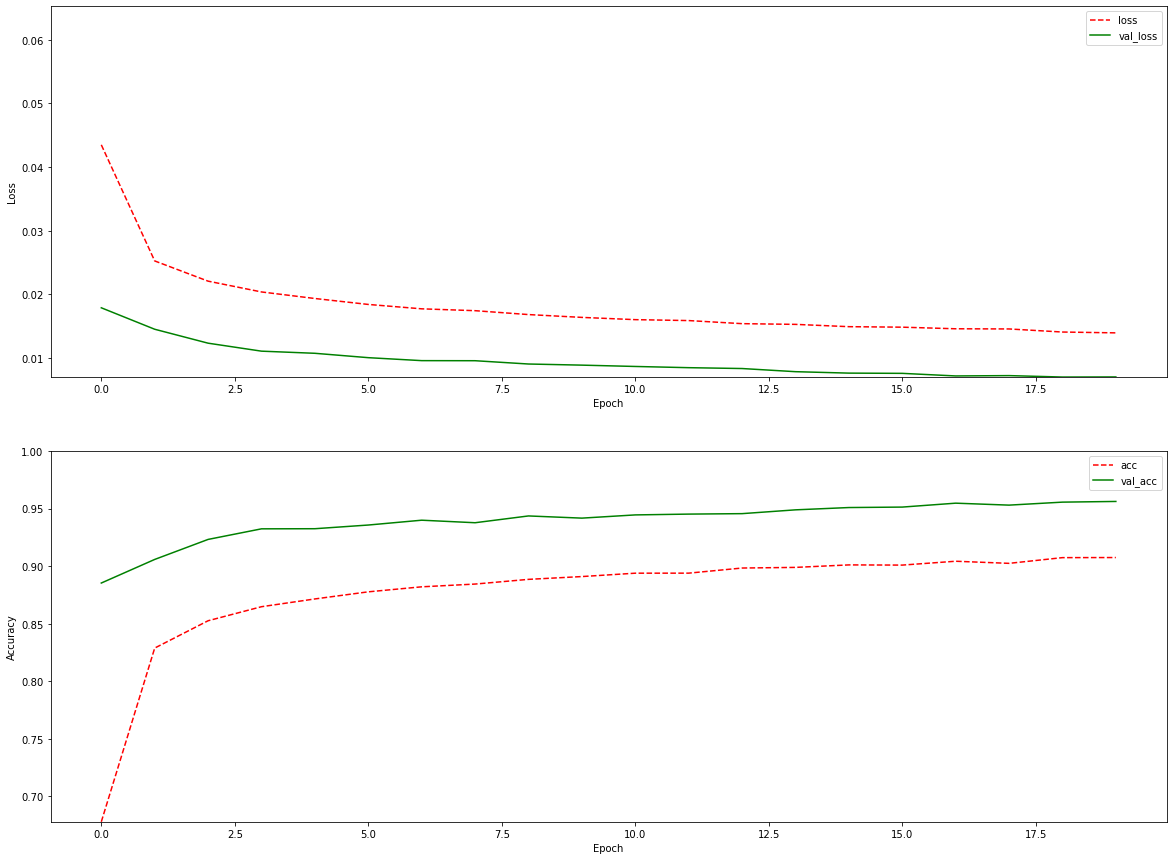

In [11]:
one_plot(history.history['loss'], history.history['val_loss'],
         history.history['accuracy'], history.history['val_accuracy'])

In [8]:
model = load_model('mnist/mnist_class_conv2d.model')
y_pred = model.predict(x_test)
predicted_labels = np.array([np.argmax(x) for x in y_pred], dtype = np.int32)
true_labels = np.array([np.argmax(x) for x in y_test], dtype = np.int32)
print(classification_report(true_labels, predicted_labels))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.95      0.93      0.94      1010
           4       0.97      0.93      0.95       982
           5       0.95      0.93      0.94       892
           6       0.94      0.97      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.93      0.93      0.93       974
           9       0.90      0.95      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



<AxesSubplot:>

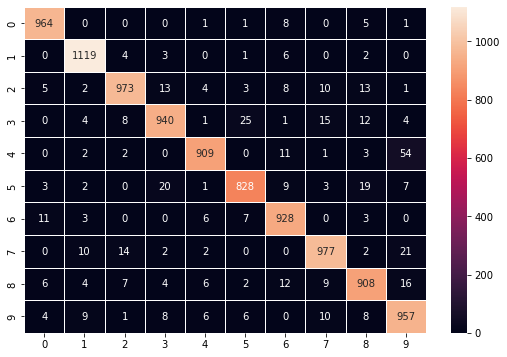

In [20]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(confusion_matrix(true_labels, predicted_labels), annot=True, fmt="d", linewidths=.5, ax=ax)